In [1]:
from os.path import join, isdir
from os import sep, getcwd, chdir
from ExperimentSettings import EXPERIMENT_SETTINGS
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import networkx as nx
from os.path import join
import json
import numpy as np
from copy import deepcopy
from tqdm.autonotebook import tqdm

In [3]:
import matplotlib
matplotlib.rcParams['legend.loc'] = 'lower right'
matplotlib.rcParams['legend.fontsize'] = 9
pd.options.display.float_format = "{:,.2f}".format


In [31]:
class AvgDegreeExtractor:
    def __init__(self):
        self._i = 0
        
        self._output_dict = {}
        
    @staticmethod
    def _get_avg_degree(g, vertices):
        """
        More accurate than  taking the mean over all vertices' degrees (counting mutal edges twice)
        this one count mutual edges only once
        """
        output = 2 * len(g.edges(vertices)) / len(vertices)
        return output

    def _get_single_network_avg_degrees(self, m, p, group_size, network):
        # define paths
        adj_list_fp = join('Experiment',f'ErdosRenyi_p{p:.2f}_k[1,1]_m{m:.2f}','Data','Networks', group_size, f'comm_sizes_{str(network).zfill(2)}_test_network.adjlist')
        partition_map_fp = join('Experiment',f'ErdosRenyi_p{p:.2f}_k[1,1]_m{m:.2f}','Data','PartitionMaps', group_size, f'comm_sizes_{str(network).zfill(2)}_test.json')

        # open whole graph and its parition map
        G = nx.read_adjlist(adj_list_fp)
        with open(partition_map_fp, 'r') as file:
            partition_map = json.load(file)
            
        temp_dict = {
            'inter_p': p,
            'anom_m': m,
            'group_size': group_size,
            'network_num': network}
        
        # Extract anomalous avg. degrees
        for comm_name, comm_vertices in partition_map.items():
            comm_avg_degree = self._get_avg_degree(G, comm_vertices)
            self._output_dict[self._i] = deepcopy(temp_dict)
            self._output_dict[self._i].update({
                'comm_name': comm_name,
                'num_vertices': len(comm_vertices),
                'num_edges': len(G.edges(comm_vertices)),
                'avg_degree': comm_avg_degree})
            self._i+=1
    
    def _get_p_m_size_group_networks_avg_degrees(self, m, p, group_size):
        for network in tqdm(range(1, 6), leave=False):
            self._get_single_network_avg_degrees(m=m, p=p, group_size=group_size, network=network)
    
    def create_table(self, ms, ps, group_sizes):
        for m in tqdm(ms):
            for p in tqdm(ps, leave=False):
                for group_size in tqdm(group_sizes, leave=False):
                    self._get_p_m_size_group_networks_avg_degrees(m, p, group_size)
        return self._output_dict
    
        

In [32]:
_ALL_SIZE_GROUPS = ['min', 'quantile10', 'quartile1', 'median', 'random']  # Generated network and # Reddit  # mean?
_ALL_PS = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
#_ALL_MS = [0.05, 0.1, 0.2, 0.4, 0.8]  # Reddit
_ALL_MS = [0.01, 0.02, 0.04, 0.08, 0.16]  # Generated network

In [33]:
ade = AvgDegreeExtractor()

In [34]:
output_dict = ade.create_table(ms = _ALL_MS, ps = _ALL_PS, group_sizes = _ALL_SIZE_GROUPS)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [37]:
output = pd.DataFrame.from_dict(output_dict, orient='index')

In [38]:
#output.to_csv('_raw_avg_degrees.csv', index=False)

In [4]:
raw_avg_degrees = pd.read_csv('_raw_avg_degrees.csv')

In [10]:
raw_avg_degrees.loc[
    (raw_avg_degrees['inter_p']==0.05) &
    (raw_avg_degrees['anom_m']==0.01) &
    (raw_avg_degrees['group_size']=='min') &
    (raw_avg_degrees['network_num']==1) 
][['num_vertices', 'num_edges']].sum()

num_vertices    43312
num_edges       50816
dtype: int64

In [27]:
raw_avg_degrees.loc[
    (raw_avg_degrees['inter_p']==0.4) &
    (raw_avg_degrees['anom_m']==0.16) &
    (raw_avg_degrees['group_size']=='random') &
    (raw_avg_degrees['network_num']==2) 
][['num_vertices', 'num_edges']].sum()

num_vertices     49063
num_edges       450954
dtype: int64

# analysis

## inter_p anlysis (hopefully to ignore)

In [51]:
anom_comm_names= [f'comm0{i+1}' for i in range(110, 120)]

In [53]:
def create_single_group_size_anom_m_df(anom_m, group_size):
    output = {}
    for p in _ALL_PS:
        single_exp = raw_avg_degrees.loc[
            raw_avg_degrees['inter_p']==p].loc[
            raw_avg_degrees['anom_m']==anom_m].loc[
            raw_avg_degrees['group_size']==group_size]

        single_exp_norm = single_exp[~single_exp['comm_name'].isin(anom_comm_names)].reset_index()
        single_exp_anom = single_exp[single_exp['comm_name'].isin(anom_comm_names)].reset_index()
        output[p] = {'norm': single_exp_norm['avg_degree'].mean(),'anom': single_exp_anom['avg_degree'].mean()}
    output = pd.DataFrame.from_dict(output, orient='index')
    return output
    


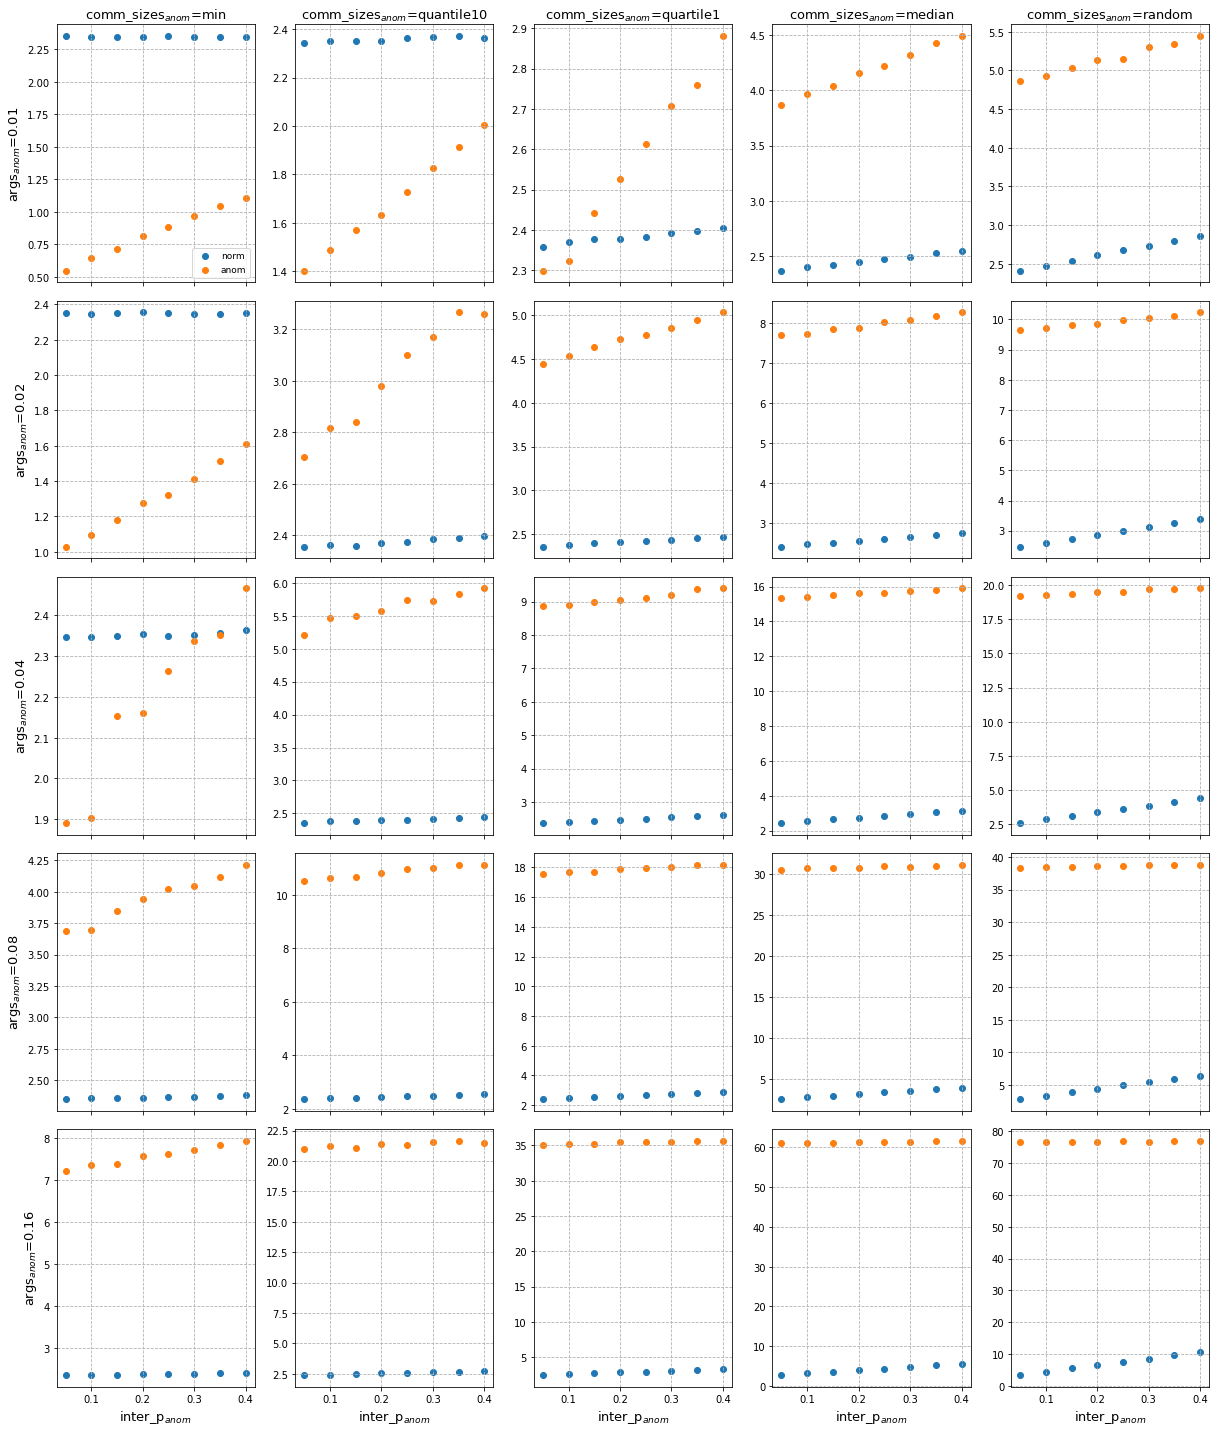

In [54]:
fig, axes = plt.subplots(
    len(_ALL_MS), len(_ALL_SIZE_GROUPS),
    sharex=True,# sharey=True,
    figsize=(17, 20),
    tight_layout=True)

for i, m in enumerate(_ALL_MS):
    for j, size_group in enumerate(_ALL_SIZE_GROUPS):
        
        df = create_single_group_size_anom_m_df(m, size_group)
        axes[i, j].scatter(x=df.index, y=df.norm, label='norm')
        axes[i, j].scatter(x=df.index, y=df.anom, label='anom')
        
        if i==0 and j==0:
            axes[i, j].legend()
        if j == 0:
            #axes[i, j].text(-0.07, 0.53, "args$_{anom}$=" + f"{m}", size=12, verticalalignment='center', rotation=90)
            axes[i, j].set_ylabel("args$_{anom}$=" + f"{m}", size=13)
        #else:
        #	axes[i, j].set_ylabel('Average precision')

        if i == 0:
            axes[i, j].set_title("comm_sizes$_{anom}$=" + f"{size_group}", fontsize=13)
        
        if i == len(_ALL_MS)-1:
            axes[i, j].set_xlabel('inter_p$_{anom}$', fontsize=13)

        axes[i, j].grid(ls='--')

#plt.setp(axes, ylim=(0.03, 1.03), xlim=(0.04, 0.41))

plt.show()

##### Conclusion - P changes is Negligible  for avg_degree

In [55]:
norm_raw_avg_degrees = raw_avg_degrees[~raw_avg_degrees['comm_name'].isin(anom_comm_names)].reset_index()
anom_raw_avg_degrees = raw_avg_degrees[raw_avg_degrees['comm_name'].isin(anom_comm_names)].reset_index()

norm_raw_avg_degrees.shape , anom_raw_avg_degrees.shape

((90000, 9), (10000, 9))

In [56]:
norm_mean_avg_degrees = norm_raw_avg_degrees.groupby(['group_size', 'anom_m']).aggregate({'avg_degree': 'mean'}).reset_index()
norm_mean_avg_degrees['group_size'] = pd.Categorical(
    norm_mean_avg_degrees['group_size'],
    categories=_ALL_SIZE_GROUPS,
)
norm_mean_avg_degrees.sort_values(['group_size', 'anom_m'], inplace=True)

anom_mean_avg_degrees = anom_raw_avg_degrees.groupby(['group_size', 'anom_m']).aggregate({'avg_degree': 'mean'}).reset_index()
anom_mean_avg_degrees['group_size'] = pd.Categorical(
    anom_mean_avg_degrees['group_size'],
    categories=_ALL_SIZE_GROUPS,
)
anom_mean_avg_degrees.sort_values(['group_size', 'anom_m'], inplace=True)

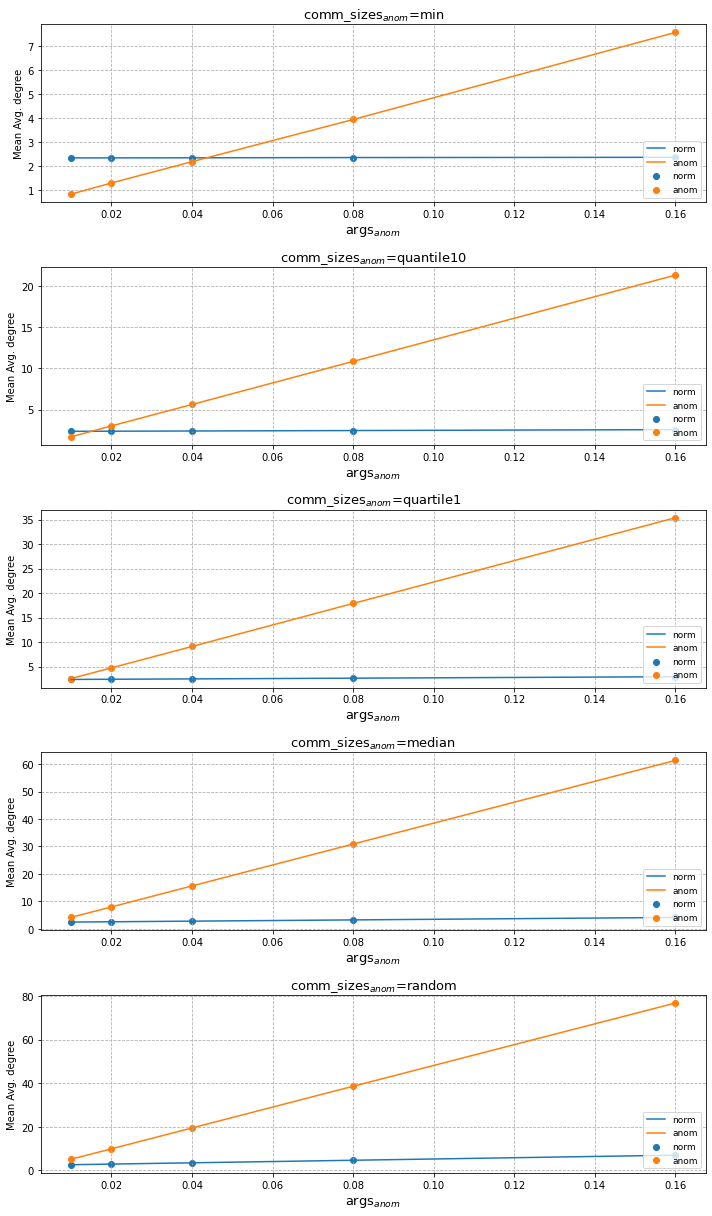

In [57]:
fig, axes = plt.subplots(
    len(_ALL_SIZE_GROUPS), 1,
    #sharex=True,# sharey=True,
    figsize=(10, 17),
    tight_layout=True)

for j, size_group in enumerate(_ALL_SIZE_GROUPS):
        
    norm_mean_avg_degrees_temp = norm_mean_avg_degrees[norm_mean_avg_degrees['group_size']==size_group]
    anom_mean_avg_degrees_temp = anom_mean_avg_degrees[anom_mean_avg_degrees['group_size']==size_group]
    
    axes[j].plot(norm_mean_avg_degrees_temp.anom_m, norm_mean_avg_degrees_temp.avg_degree, label='norm')
    axes[j].plot(anom_mean_avg_degrees_temp.anom_m, anom_mean_avg_degrees_temp.avg_degree, label='anom')
    
    axes[j].scatter(x=norm_mean_avg_degrees_temp.anom_m, y=norm_mean_avg_degrees_temp.avg_degree, label='norm')
    axes[j].scatter(x=anom_mean_avg_degrees_temp.anom_m, y=anom_mean_avg_degrees_temp.avg_degree, label='anom')
    
    axes[j].legend()
    axes[j].set_ylabel('Mean Avg. degree')
    axes[j].set_title("comm_sizes$_{anom}$=" + f"{size_group}", fontsize=13)
    axes[j].set_xlabel("args$_{anom}$", fontsize=13)
    axes[j].grid(ls='--')


plt.show()

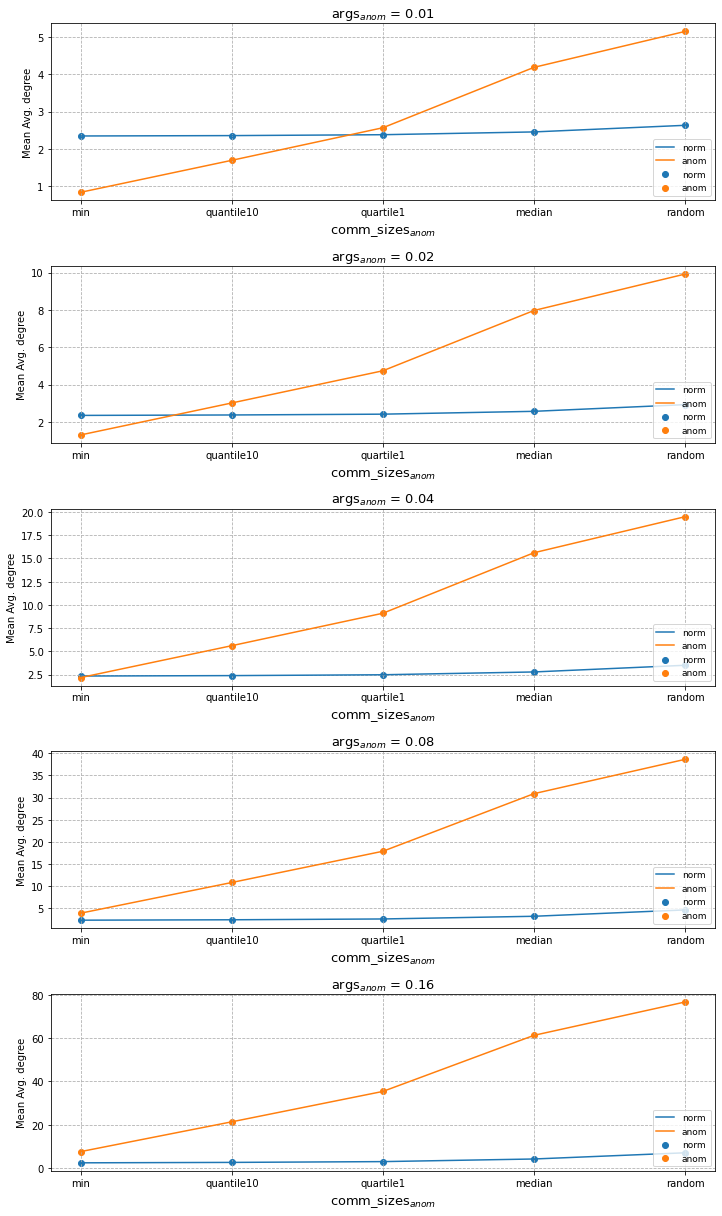

In [58]:
fig, axes = plt.subplots(
    len(_ALL_MS), 1,
    #sharex=True,# sharey=True,
    figsize=(10, 17),
    tight_layout=True)

for j, m in enumerate(_ALL_MS):
        
    norm_mean_avg_degrees_temp = norm_mean_avg_degrees[norm_mean_avg_degrees['anom_m']==m]
    anom_mean_avg_degrees_temp = anom_mean_avg_degrees[anom_mean_avg_degrees['anom_m']==m]
    
    axes[j].plot(norm_mean_avg_degrees_temp.group_size, norm_mean_avg_degrees_temp.avg_degree, label='norm')
    axes[j].plot(anom_mean_avg_degrees_temp.group_size, anom_mean_avg_degrees_temp.avg_degree, label='anom')
    
    axes[j].scatter(x=norm_mean_avg_degrees_temp.group_size, y=norm_mean_avg_degrees_temp.avg_degree, label='norm')
    axes[j].scatter(x=anom_mean_avg_degrees_temp.group_size, y=anom_mean_avg_degrees_temp.avg_degree, label='anom')
    
    axes[j].legend()
    axes[j].set_ylabel('Mean Avg. degree')
    axes[j].set_title("args$_{anom}$ = " + f'{str(m).zfill(2)}', fontsize=13)
    axes[j].set_xlabel("comm_sizes$_{anom}$", fontsize=13)
    axes[j].grid(ls='--')


plt.show()

In [63]:
norm_mean_avg_degrees.pivot(index='anom_m', columns='group_size', values='avg_degree')

group_size,min,quantile10,quartile1,median,random
anom_m,,,,,
0.01,2.35,2.36,2.38,2.46,2.63
0.02,2.35,2.37,2.42,2.57,2.93
0.04,2.35,2.40,2.49,2.79,3.51
0.08,2.36,2.45,2.64,3.24,4.68
0.16,2.37,2.57,2.93,4.14,7.01


In [83]:
(526.314 * 0.075) / 110

0.3588504545454545

In [100]:
2 + (520 * 0.075) / 110

2.3545454545454545

In [95]:
3.47 / 2.35

1.476595744680851

In [98]:
2.35*1.48

3.478

In [64]:
anom_mean_avg_degrees.pivot(index='anom_m', columns='group_size', values='avg_degree')

group_size,min,quantile10,quartile1,median,random
anom_m,,,,,
0.01,0.84,1.70,2.57,4.19,5.15
0.02,1.31,3.02,4.74,7.97,9.92
0.04,2.19,5.62,9.11,15.62,19.49
0.08,3.95,10.86,17.90,30.87,38.60
0.16,7.57,21.34,35.40,61.34,76.76


In [65]:
norm_mean_avg_degrees.pivot(index='anom_m', columns='group_size', values='avg_degree')-anom_mean_avg_degrees.pivot(index='anom_m', columns='group_size', values='avg_degree')

group_size,min,quantile10,quartile1,median,random
anom_m,,,,,
0.01,1.51,0.66,-0.19,-1.73,-2.52
0.02,1.04,-0.64,-2.33,-5.40,-7.00
0.04,0.16,-3.22,-6.62,-12.82,-15.98
0.08,-1.59,-8.40,-15.26,-27.63,-33.93
0.16,-5.20,-18.78,-32.47,-57.20,-69.75


In [66]:
anom_mean_avg_degrees.pivot(index='anom_m', columns='group_size', values='avg_degree') / norm_mean_avg_degrees.pivot(index='anom_m', columns='group_size', values='avg_degree')

group_size,min,quantile10,quartile1,median,random
anom_m,,,,,
0.01,0.36,0.72,1.08,1.70,1.96
0.02,0.56,1.27,1.96,3.10,3.39
0.04,0.93,2.34,3.66,5.59,5.55
0.08,1.67,4.42,6.79,9.52,8.26
0.16,3.19,8.32,12.07,14.80,10.95


# size ditribution anlysis

In [79]:
norm_comm_dist = raw_avg_degrees[~raw_avg_degrees['comm_name'].isin(anom_comm_names)]
anom_comm_dist = raw_avg_degrees[raw_avg_degrees['comm_name'].isin(anom_comm_names)]

normal community sizes are affected from their original size (given - sampled from reddit, sampled size from reddit)<br>
and inter_p and anom_comm_sizes, which affects number of interconnections, thus affecting thier sizes

In [101]:
norm_comm_dist = norm_comm_dist.groupby(
    ['inter_p','group_size']).aggregate(
    {'num_vertices': 'describe'}).reset_index()

norm_comm_dist['group_size'] = pd.Categorical(
    norm_comm_dist['group_size'],
    categories=_ALL_SIZE_GROUPS,
)

norm_comm_dist.pivot(
    index='inter_p', columns='group_size', values=('num_vertices', 'mean'))

group_size,min,quantile10,quartile1,median,random
inter_p,,,,,
0.05,521.40,521.80,522.19,522.93,523.38
0.10,521.60,522.41,523.12,524.66,525.48
0.15,521.84,523.00,524.15,526.43,527.63
0.20,522.05,523.64,525.13,528.05,529.88
0.25,522.25,524.16,526.05,529.86,532.08
0.30,522.45,524.82,527.04,531.56,534.13
0.35,522.70,525.40,528.08,533.29,536.30
0.40,522.89,525.99,529.11,535.09,538.56


<AxesSubplot:xlabel='inter_p'>

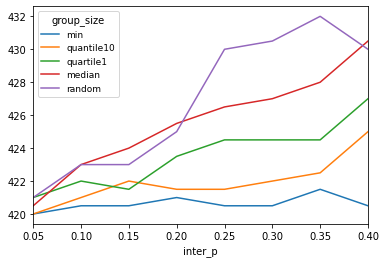

In [69]:
norm_comm_dist.pivot(index='inter_p', columns='group_size', values=('num_vertices', '50%')).plot()

anomalous community sizes are not affected of inter_p it anom_m, thus only checked agians group_size

In [70]:
anom_comm_dist['group_size'] = pd.Categorical(
    anom_comm_dist['group_size'],
    categories=_ALL_SIZE_GROUPS,
)
anom_comm_dist.groupby(['group_size']).aggregate({'num_vertices': ['mean', 'median']})

num_vertices       
                   mean median
group_size                    
min               46.22  36.00
quantile10       132.20 136.50
quartile1        219.82 227.50
median           381.98 393.00
random           478.44 411.00